## Introduction

### Context
I aim to analyze the results from the [xkcd Color Survey](https://github.com/rfordatascience/tidytuesday/blob/main/data/2025/2025-07-08/readme.md).
The survey was taken in 2010, got hundreds of thousands of responses, and asked respondents to name colors they saw with the goal of
"revealing the different ways in which people perceive and label colors".

### Question to answer
* Is there any significant difference between groups in their categorization of colors?
* If so, can the groups be found and labelled?
* Who is the most and least accurate?
* Are certain groups more likely to more specific in the names they give colors?
* Which colors are mentioned most?

### Data
There are three tables in the dataset. The variables we are given are:

* Answers table (answers.csv):\
  `user-id`: ID of the user who gave the answer\
  `hex`: Hex color code shown to the user\
  `rank`: "Rank of the color" that the user gave as an answer (i.e. a foreign key into the "color_ranks" table).

* Colors (color_ranks.csv):\
  `color`: The name of the color\
  `rank`: Rank of the color\
  `hex`: Hex code of the color

* Users (users.csv):\
  `user_id`: Self explanatory\
  `monitor`: User's monitor type\
  `y_chromosome`: Whether the user reported as having a y chromosome or not.\
  `colorblind`: Whether the user reported as being colorblind or not.\
  `spam_prob`: Probability of user being a spam user (0-1).


## Simple data exploration

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Get data
answers = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-07-08/answers.csv")
color_ranks = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-07-08/color_ranks.csv")
users = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-07-08/users.csv")

# Clean data
color_ranks = color_ranks.set_index('rank')
users = users.set_index('user_id').astype({'y_chromosome': 'bool',
                                           'colorblind': 'bool'})

In [3]:
# Example for purple
purple_rank = 1
purple_real_hex = color_ranks['hex'].loc[purple_rank].upper()
print("Purple hex value: " + purple_real_hex)

# Colors that people named purple
purple_answers = answers[answers['rank'] == purple_rank]
purple_answers.head()


Purple hex value: #7E1E9C


,user_id,hex,rank
0,1,#8240EA,1
4,2,#B343E5,1
8,4,#9A2A9F,1
14,6,#74324C,1
18,7,#BA75ED,1


## Your new shiny data visualization

### Explain what you show, might require math
- I might need to average colors: how is this defined?
- I might need to choose colors that are "close" to another color, or sort them into groups: how?
- To group people by answers, I can use k-means clustering.

### Show

<Axes: xlabel='group'>

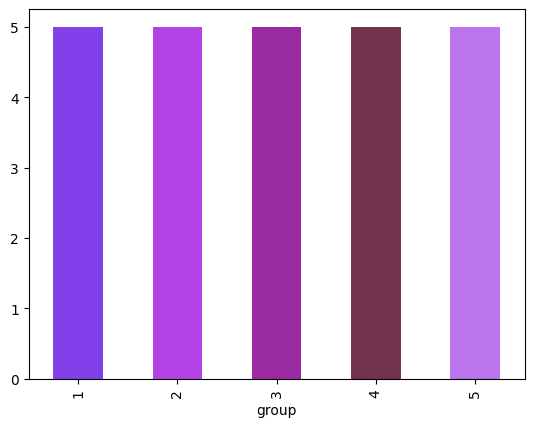

In [12]:
# | label: fig-super-simple-example-figure
# | fig-cap: In the real analysis the height of the bar would coorespond to the number of answers
egdf = pd.DataFrame({'group': [1, 2, 3, 4, 5], 'val': [5, 5, 5, 5, 5]})
egdf.plot.bar(x='group', y='val', color=purple_answers['hex'], legend=False)

### Comment
See the above figure! (@fig-super-simple-example-figure)


## Conclusion